# Steps to Tackle a Time Series Problem

## Loading and Handling TS in Pandas

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [79]:
data = pd.read_csv('data/AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [82]:
pd.to_datetime(data.Month)

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Reading as datetime format:

Check https://strftime.org/ for formatting options.

In [60]:
from datetime import datetime 

In [84]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
dateparse('1987-02')

datetime.datetime(1987, 2, 1, 0, 0)

In [85]:
 fecha = datetime(2013, 9, 30)

In [86]:
fecha.strftime('%A, %Y-%m-%d %H:%M')

'Monday, 2013-09-30 00:00'

In [87]:
datetime.strptime('Monday, 2013-09-30 00:00','%A, %Y-%m-%d %H:%M')

datetime.datetime(2013, 9, 30, 0, 0)

In [90]:
data = pd.read_csv('data/AirPassengers.csv', date_parser=dateparse, parse_dates=['Month'])
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [92]:
data.set_index('Month', inplace=True)

In [93]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [94]:
#check datatype of index
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [99]:
data['1950-01':'1950-06']

,#Passengers
Month,
1950-01-01,115
1950-02-01,126
1950-03-01,141
1950-04-01,135
1950-05-01,125
1950-06-01,149


In [100]:
help(pd.date_range)

Help on function date_range in module pandas.core.indexes.datetimes:

date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs) -> pandas.core.indexes.datetimes.DatetimeIndex
    Return a fixed frequency DatetimeIndex.
    
    Parameters
    ----------
    start : str or datetime-like, optional
        Left bound for generating dates.
    end : str or datetime-like, optional
        Right bound for generating dates.
    periods : int, optional
        Number of periods to generate.
    freq : str or DateOffset, default 'D'
        Frequency strings can have multiples, e.g. '5H'. See
        :ref:`here <timeseries.offset_aliases>` for a list of
        frequency aliases.
    tz : str or tzinfo, optional
        Time zone name for returning localized DatetimeIndex, for example
        'Asia/Hong_Kong'. By default, the resulting DatetimeIndex is
        timezone-naive.
    normalize : bool, default False
        Normalize start/

In [105]:
pd.date_range(start='2020-01-01', freq='W-MON', end='2020-12-31')

DatetimeIndex(['2020-01-06', '2020-01-13', '2020-01-20', '2020-01-27',
               '2020-02-03', '2020-02-10', '2020-02-17', '2020-02-24',
               '2020-03-02', '2020-03-09', '2020-03-16', '2020-03-23',
               '2020-03-30', '2020-04-06', '2020-04-13', '2020-04-20',
               '2020-04-27', '2020-05-04', '2020-05-11', '2020-05-18',
               '2020-05-25', '2020-06-01', '2020-06-08', '2020-06-15',
               '2020-06-22', '2020-06-29', '2020-07-06', '2020-07-13',
               '2020-07-20', '2020-07-27', '2020-08-03', '2020-08-10',
               '2020-08-17', '2020-08-24', '2020-08-31', '2020-09-07',
               '2020-09-14', '2020-09-21', '2020-09-28', '2020-10-05',
               '2020-10-12', '2020-10-19', '2020-10-26', '2020-11-02',
               '2020-11-09', '2020-11-16', '2020-11-23', '2020-11-30',
               '2020-12-07', '2020-12-14', '2020-12-21', '2020-12-28'],
              dtype='datetime64[ns]', freq='W-MON')

In [106]:
#convert to time series:
ts = data['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

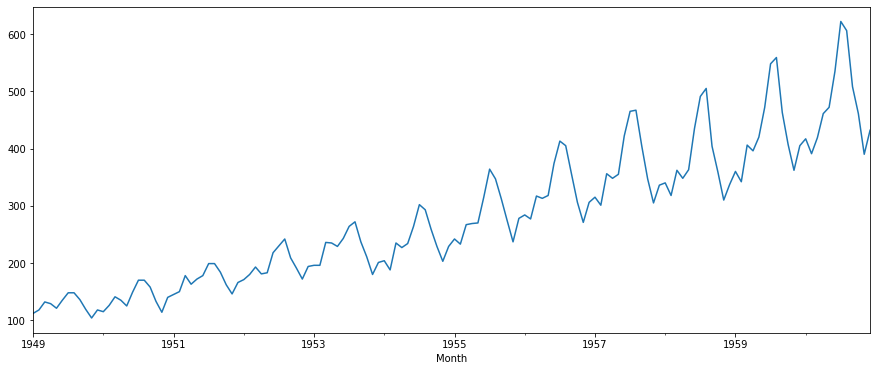

In [107]:
ts.plot()

In [114]:
ts.resample('D').mean()

Month
1949-01-01    112.0
1949-01-02      NaN
1949-01-03      NaN
1949-01-04      NaN
1949-01-05      NaN
              ...  
1960-11-27      NaN
1960-11-28      NaN
1960-11-29      NaN
1960-11-30      NaN
1960-12-01    432.0
Freq: D, Name: #Passengers, Length: 4353, dtype: float64

In [115]:
from scipy import interpolate

In [118]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)

In [119]:
dir(decomposition)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_observed',
 '_resid',
 '_seasonal',
 '_trend',
 '_weights',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend',
 'weights']

In [120]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [133]:
trend.head(10)

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
Name: trend, dtype: float64

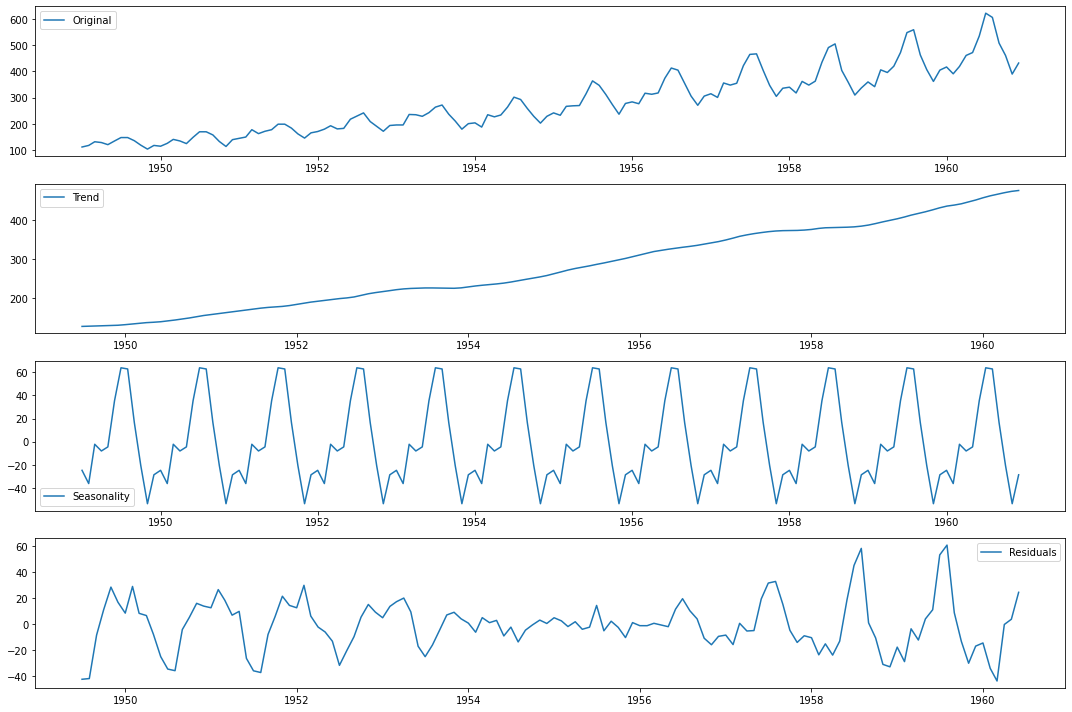

In [121]:
plt.figure(figsize=(15,10))
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

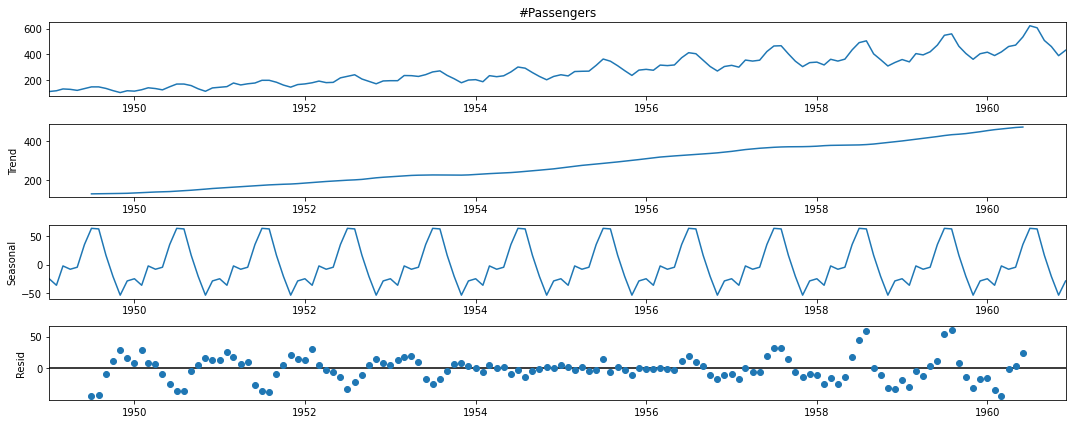

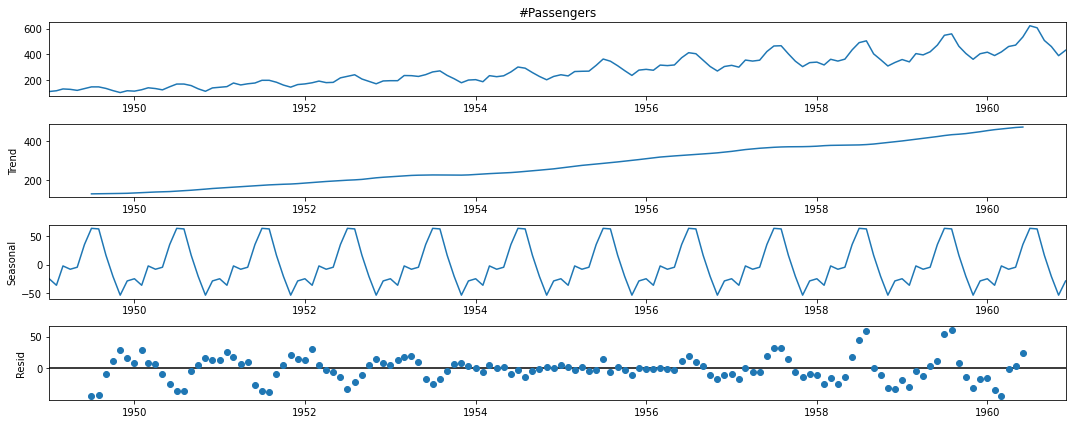

In [122]:
decomposition.plot()

### Indexing TS arrays:

In [12]:
#1. Specific the index as a string constant:
ts['1949-01-01']

112

In [13]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(1949,1,1)]

112

#Get range:

In [14]:
#1. Specify the entire range:
ts['1949':'1952']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
1951-02-01    150
1951-03-01    178
1951-04-01    163
1951-05-01    172
1951-06-01    178
1951-07-01    199
1951-08-01    199
1951-09-01    184
1951-10-01    162
1951-11-01    146
1951-12-01    166
1952-01-01    171
1952-02-01    180
1952-03-01    193
1952-04-01    181
1952-05-01    183
1952-06-01    218
1952-07-01    230
1952-08-01    242
1952-09-01    209
1952-10-01    191
1952-11-01    172
1952-12-01    194
Name: #Passengers, dtype: int64

In [15]:
#2. Use ':' if one of the indices is at ends:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

Note: ends included here

In [16]:
#All rows of 1949:
ts['1951':]

Month
1951-01-01    145
1951-02-01    150
1951-03-01    178
1951-04-01    163
1951-05-01    172
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 120, dtype: int64

# Checking for stationarity

## Plot the time-series

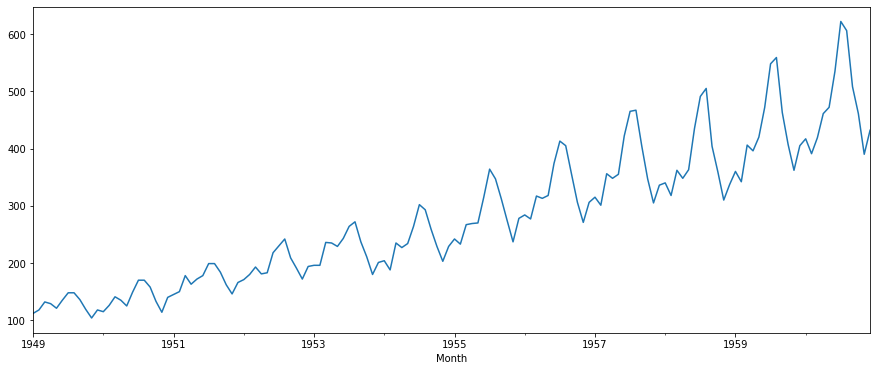

In [134]:
ts.plot()

### Function for testing stationarity

In [135]:
from statsmodels.tsa.stattools import adfuller
adfuller(ts, autolag='AIC')

(0.815368879206047,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

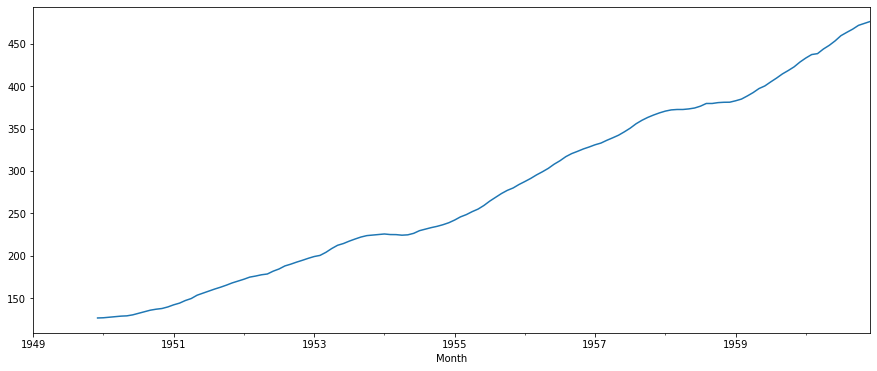

In [147]:
ma = ts.rolling(12).mean()
ma.plot()

In [148]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    # Determing rolling statistics
    # rolmean = pd.rolling_mean(timeseries, window=12)
    # rolstd = pd.rolling_std(timeseries, window=12)
    
    rolstd = timeseries.rolling(12).std()    
    rolmean = timeseries.rolling(12).mean()


    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)

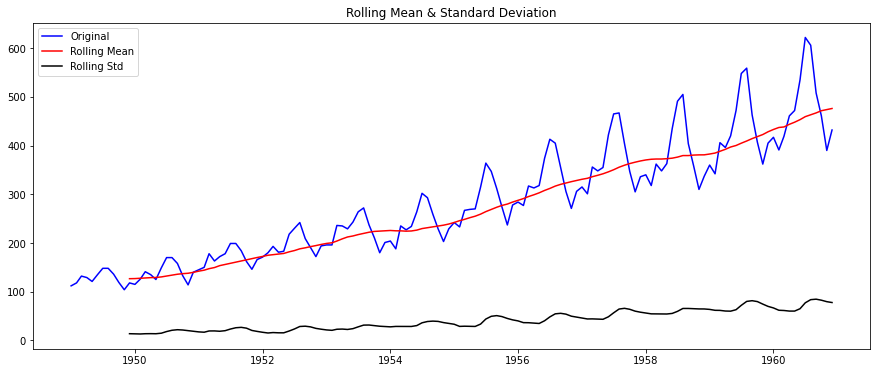

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [149]:
test_stationarity(ts)

# Making TS Stationary


## Estimating & Eliminating Trend


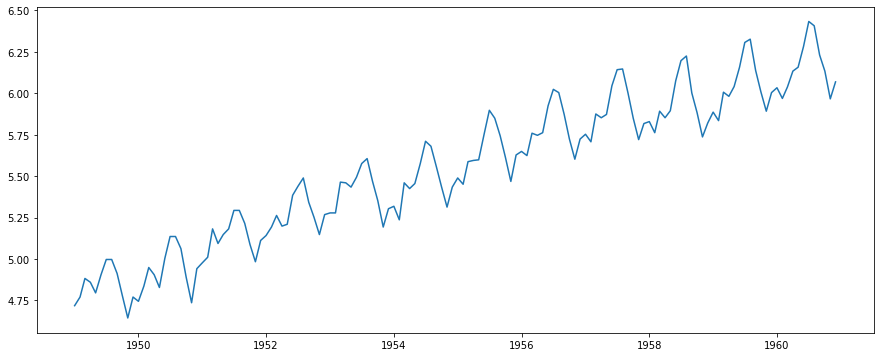

In [150]:
ts_log = np.log(ts)
plt.plot(ts_log)

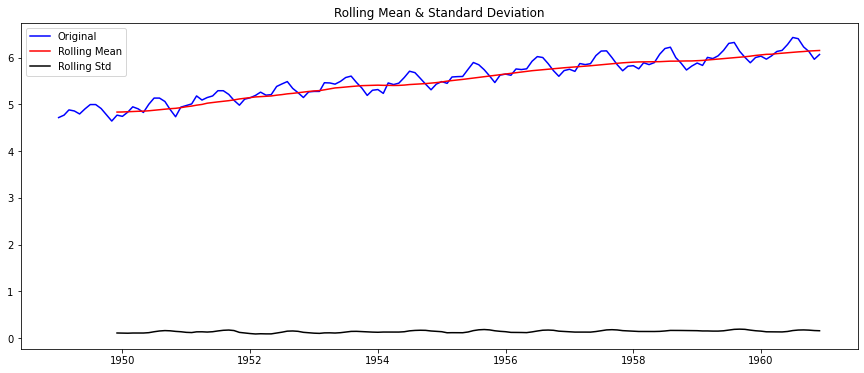

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [152]:
test_stationarity(ts_log)

## Smoothing:

### Moving average

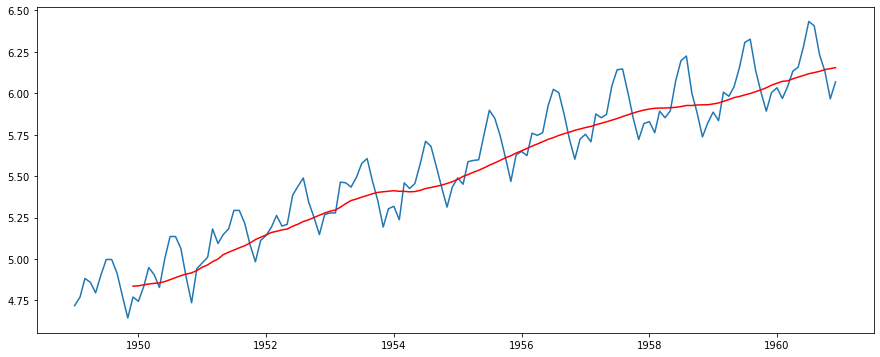

In [153]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [154]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

In [155]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

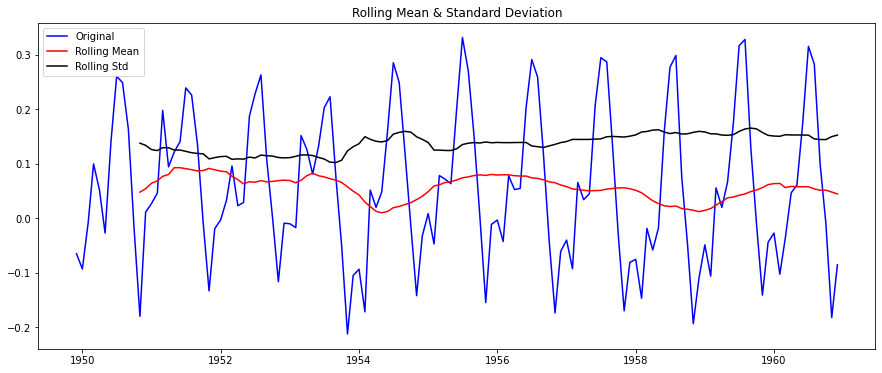

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [156]:
test_stationarity(ts_log_moving_avg_diff)

### Exponentially Weighted Moving Average

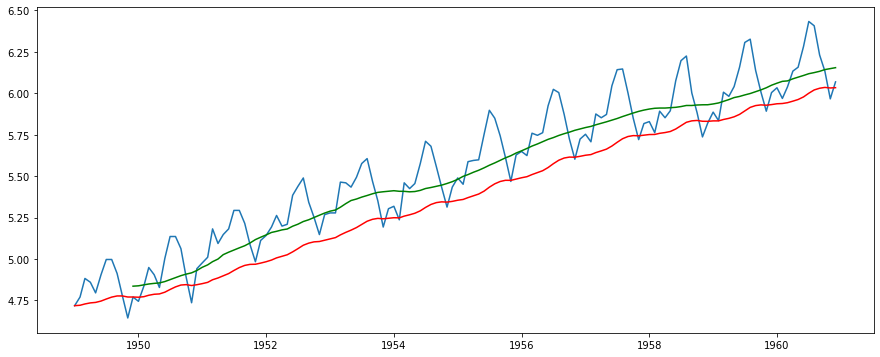

In [158]:
# expwighted_avg = ts_log.rolling(12).ewma()
expwighted_avg = ts_log.ewm(span=40,adjust=False).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
plt.plot(moving_avg, color='green')

# expwighted_avg.plot(style='k--')

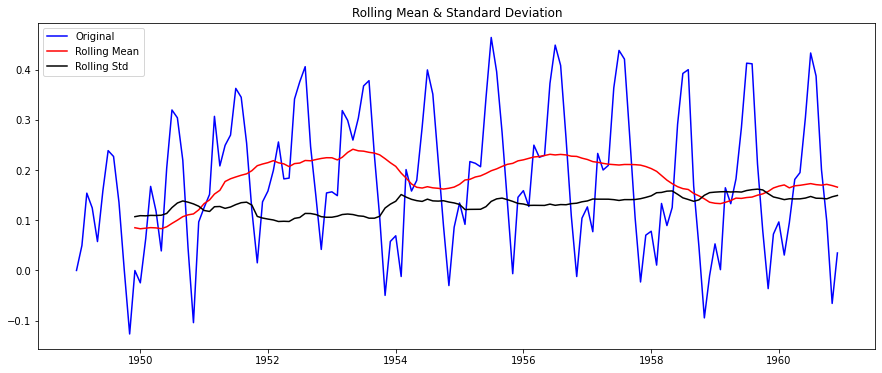

Results of Dickey-Fuller Test:
Test Statistic                  -2.944517
p-value                          0.040411
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [159]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

## Eliminating Trend and Seasonality

### Differencing:

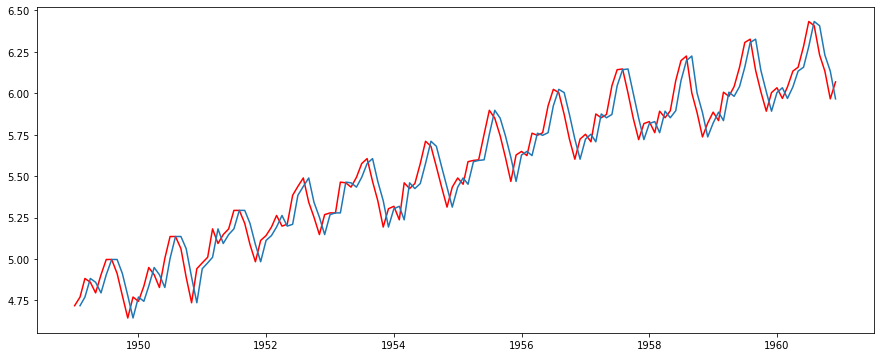

In [163]:
plt.plot(ts_log, color='red')
plt.plot(ts_log.shift())

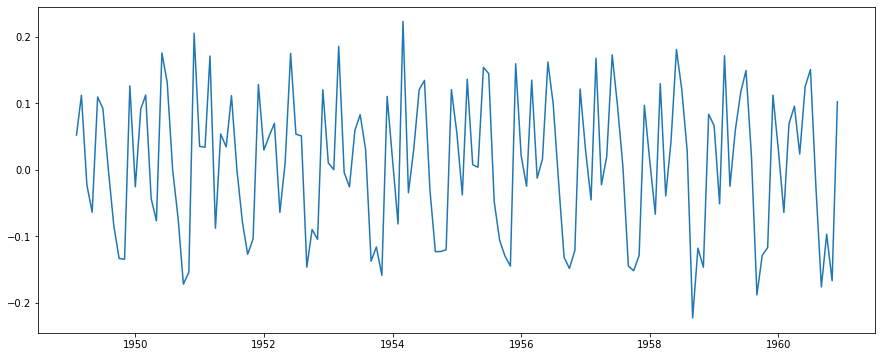

In [164]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

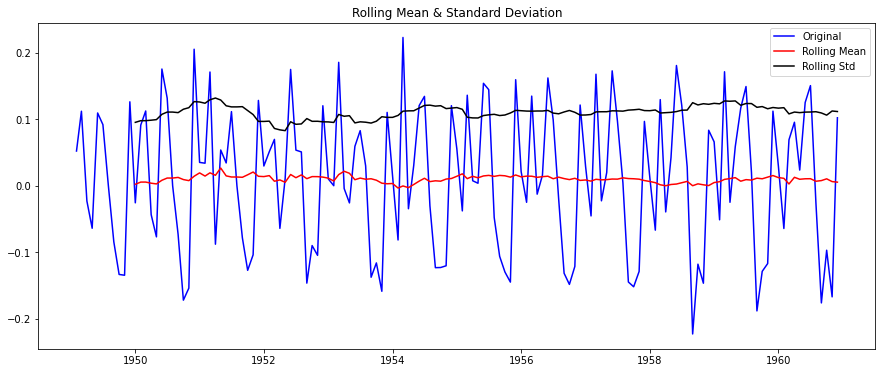

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [165]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### Decomposition:

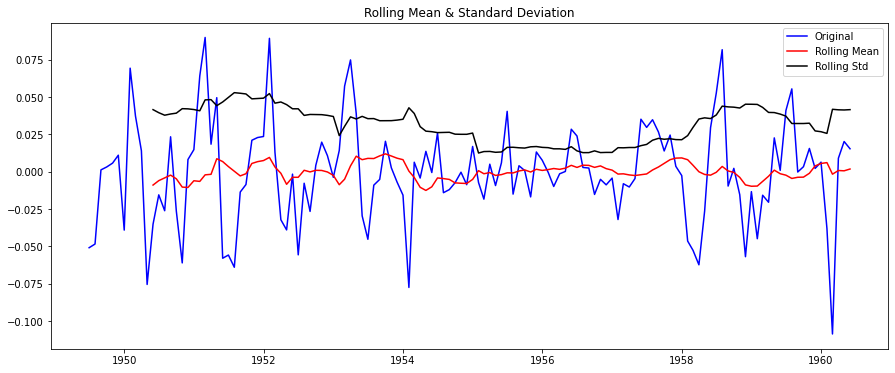

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [166]:
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

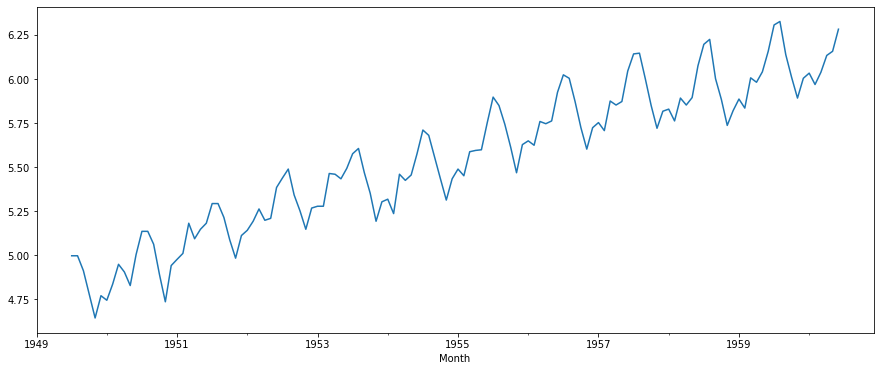

In [329]:
(trend + seasonal + residual).plot()

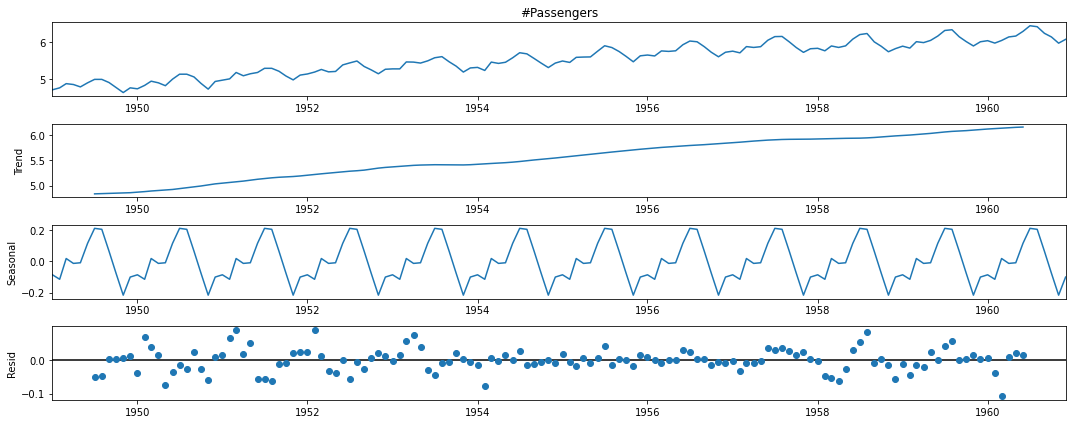

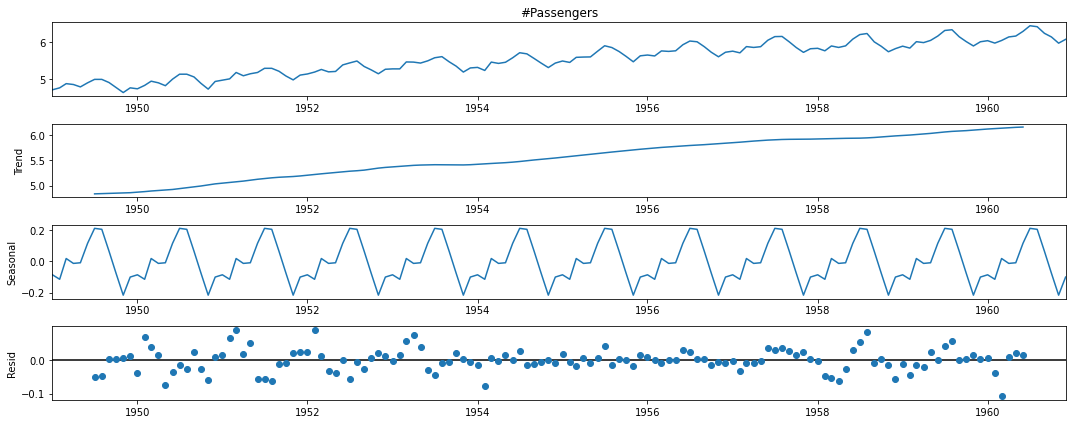

In [167]:
decomposition.plot()

# Final Forecasting

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

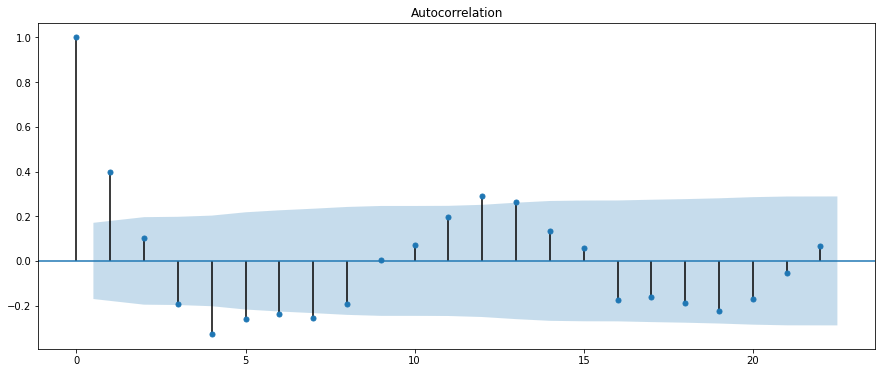

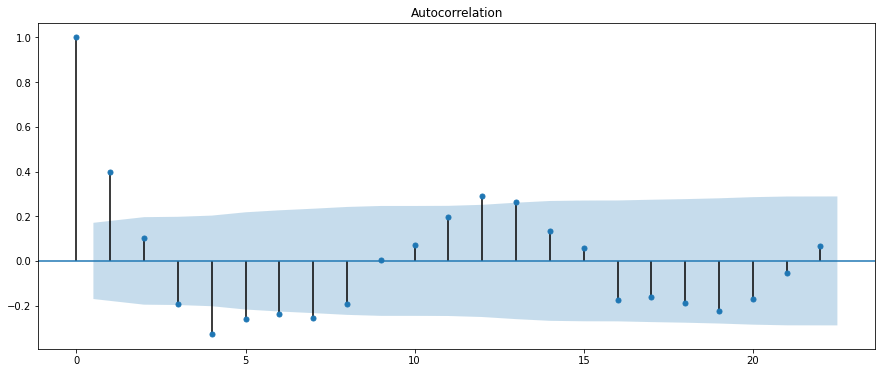

In [169]:
plot_acf(ts_log_decompose)

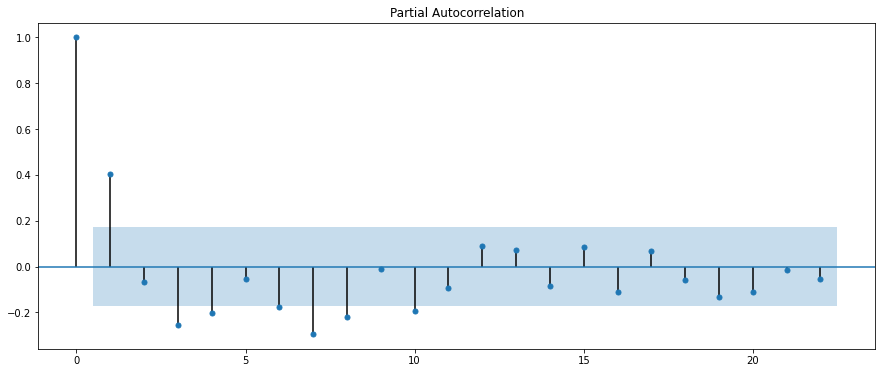

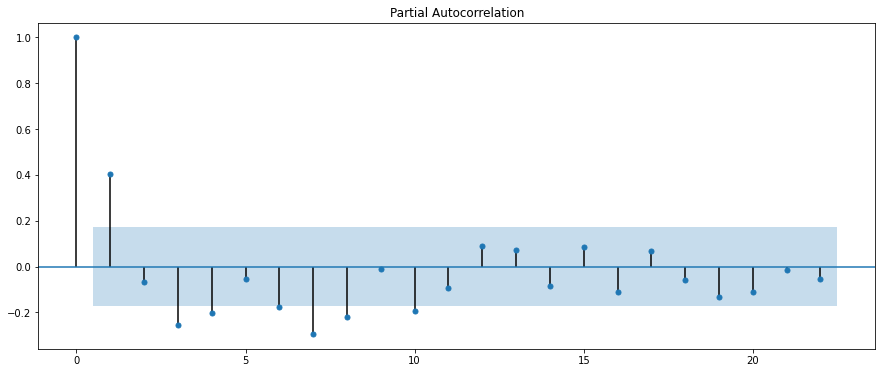

In [174]:
plot_pacf(ts_log_decompose)

## ARIMA Model

In [170]:
from statsmodels.tsa.arima_model import ARIMA

## AR model

In [411]:
model = ARIMA(ts_log_moving_avg_diff, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)

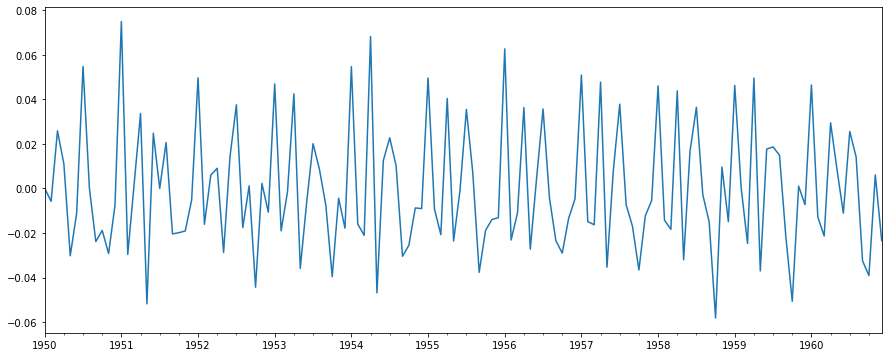

In [412]:
results_AR.fittedvalues.plot()

Text(0.5, 1.0, 'RSS: nan')

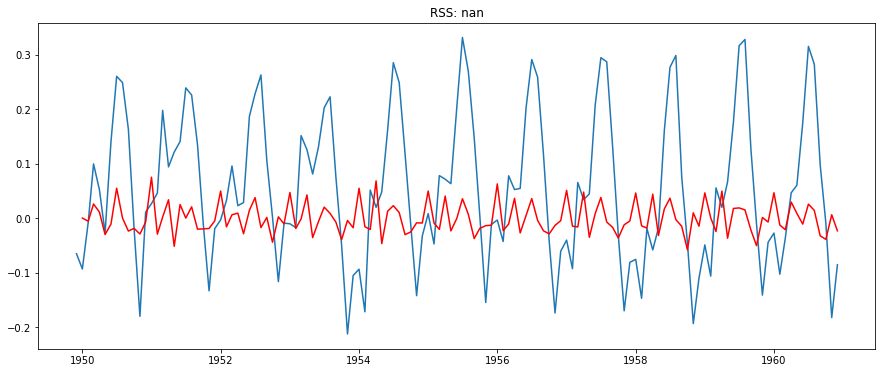

In [410]:
plt.plot(ts_log_moving_avg_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_moving_avg_diff)**2))

### MA Model

/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: nan')

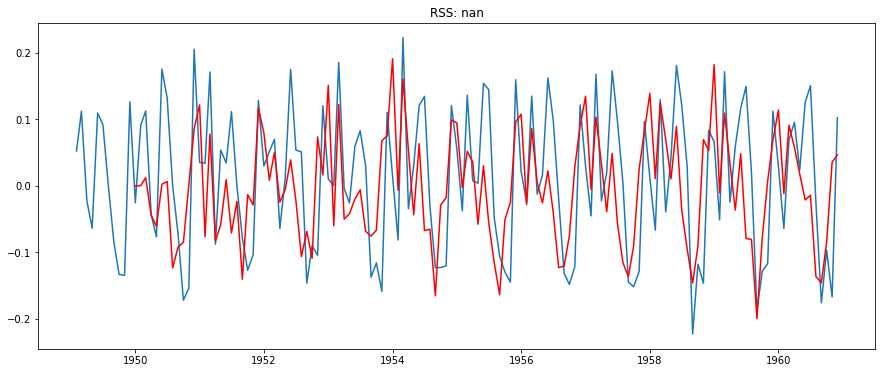

In [212]:
model = ARIMA(ts_log_moving_avg_diff, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_moving_avg_diff)**2))

### ARIMA Model:

In [439]:
ts_log_moving_avg_diff

1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
                ...   
1960-08-01    0.282363
1960-09-01    0.098235
1960-10-01   -0.009230
1960-11-01   -0.182690
1960-12-01   -0.085789
Freq: MS, Name: #Passengers, Length: 133, dtype: float64

In [440]:
adfuller(ts_log_moving_avg_diff)

(-3.162907991300857,
 0.022234630001243903,
 13,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -436.63269481747125)

Text(0.5, 1.0, 'RSS: nan')

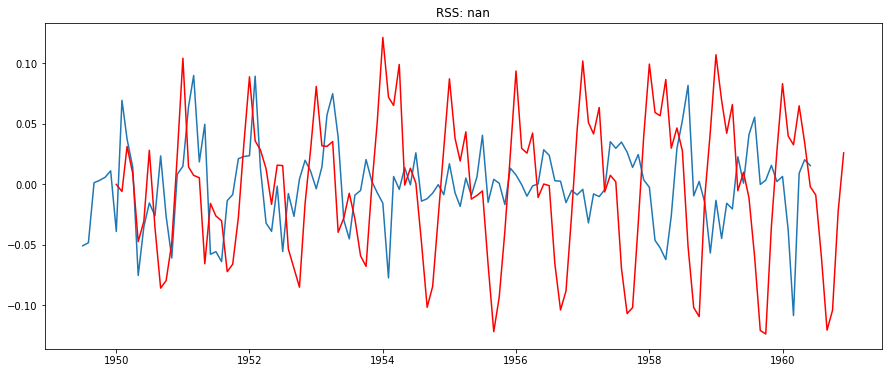

In [441]:
model = ARIMA(ts_log_moving_avg_diff, order=(2, 1, 1))  
results_ARIMA = model.fit()  

plt.plot(residual)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-residual)**2))

# Convert to original scale:

## Get fitted values

In [442]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

1950-01-01   -0.000174
1950-02-01   -0.006043
1950-03-01    0.031151
1950-04-01    0.008884
1950-05-01   -0.047468
Freq: MS, dtype: float64

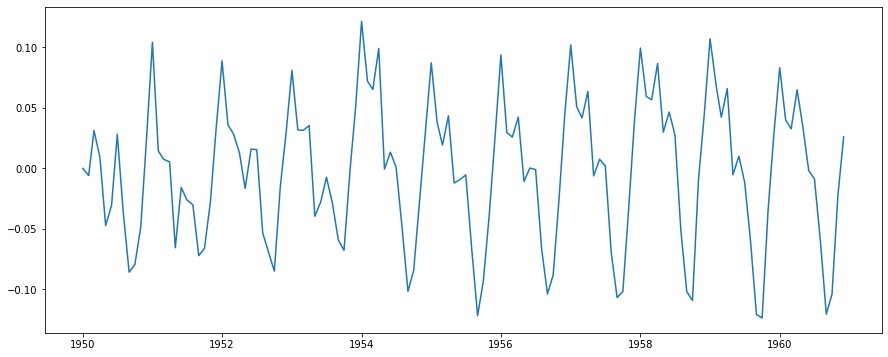

In [443]:
plt.plot(predictions_ARIMA_diff)

## Get cumulative sum of fitted values

In [444]:
predictions_ARIMA_diff_cumsum = (predictions_ARIMA_diff).cumsum() + moving_avg
predictions_ARIMA_diff_cumsum.head()

1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
dtype: float64

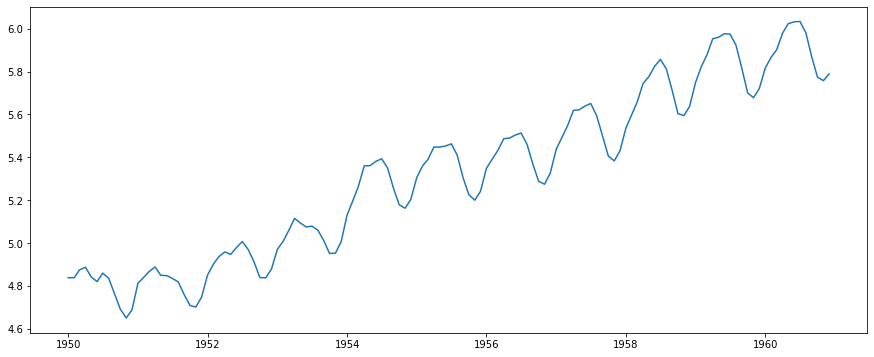

In [446]:
plt.plot(predictions_ARIMA_diff_cumsum)

## Restore base level 

In [448]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718499
1949-04-01    4.718499
1949-05-01    4.718499
dtype: float64

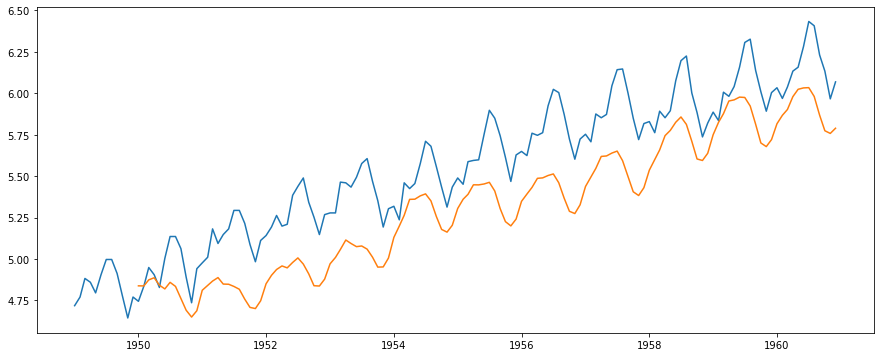

In [449]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_diff_cumsum)

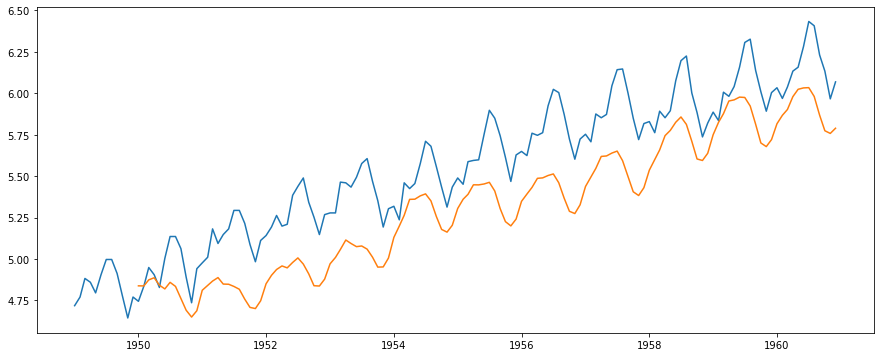

In [450]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_diff_cumsum)

## Get exponential

Text(0.5, 1.0, 'RMSE: nan')

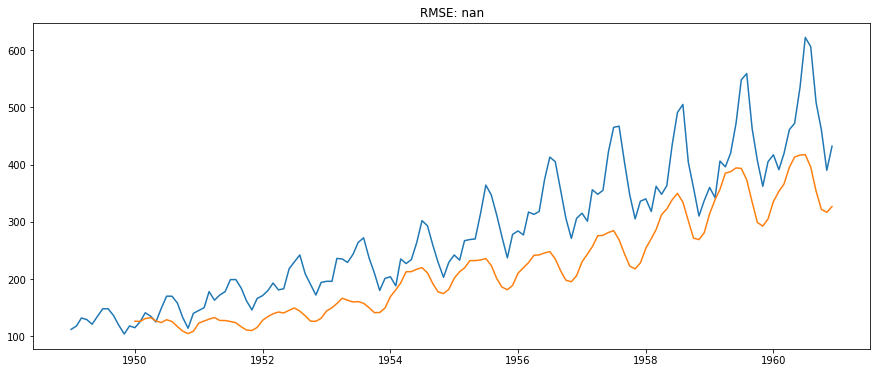

In [460]:
predictions_ARIMA = np.exp(predictions_ARIMA_diff_cumsum) 

plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

# SARIMAX

In [455]:
import itertools

In [456]:
p = d = q = range(1, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (1, 1, 2) x (1, 1, 2, 12)
SARIMAX: (1, 1, 2) x (1, 2, 1, 12)
SARIMAX: (1, 2, 1) x (1, 2, 2, 12)
SARIMAX: (1, 2, 1) x (2, 1, 1, 12)


In [457]:
import statsmodels.api as sm

In [291]:
ts_log_moving_avg_diff.index

DatetimeIndex(['1949-12-01', '1950-01-01', '1950-02-01', '1950-03-01',
               '1950-04-01', '1950-05-01', '1950-06-01', '1950-07-01',
               '1950-08-01', '1950-09-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', length=133, freq='MS')

In [297]:
ts.index = pd.DatetimeIndex(ts.index.values, freq=ts.index.inferred_freq)


In [298]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=False,
                                            freq='MS')

            results = mod.fit()

            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as e:
            print(e)
            continue

ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:1022.2987900878195
ARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:1014.9900989812924
ARIMA(1, 1, 1)x(1, 2, 1, 12) - AIC:940.9669101468065
ARIMA(1, 1, 1)x(1, 2, 2, 12) - AIC:940.9287841682582


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:1015.8639401784835


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:1015.6009473230157
ARIMA(1, 1, 1)x(2, 2, 1, 12) - AIC:942.7302356687479
ARIMA(1, 1, 1)x(2, 2, 2, 12) - AIC:942.455852485858
ARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:1024.1213759955685


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:1012.4066732554909
ARIMA(1, 1, 2)x(1, 2, 1, 12) - AIC:942.8922964930769
ARIMA(1, 1, 2)x(1, 2, 2, 12) - AIC:942.8885977140327


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:1017.7594863982093


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:1017.7643254930766
ARIMA(1, 1, 2)x(2, 2, 1, 12) - AIC:944.6702963727562


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 2, 2, 12) - AIC:945.4350291029965
ARIMA(1, 2, 1)x(1, 1, 1, 12) - AIC:1021.2157118886125


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(1, 1, 2, 12) - AIC:1014.8046156698374
ARIMA(1, 2, 1)x(1, 2, 1, 12) - AIC:944.9201038486237
ARIMA(1, 2, 1)x(1, 2, 2, 12) - AIC:946.1585542210763


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(2, 1, 1, 12) - AIC:1015.3415032401143


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(2, 1, 2, 12) - AIC:1018.115114165789
ARIMA(1, 2, 1)x(2, 2, 1, 12) - AIC:946.8624167030162


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 1)x(2, 2, 2, 12) - AIC:947.9531628899379
ARIMA(1, 2, 2)x(1, 1, 1, 12) - AIC:1023.1209971111335


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(1, 1, 2, 12) - AIC:1015.9166023995666
ARIMA(1, 2, 2)x(1, 2, 1, 12) - AIC:945.0848773722576


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(1, 2, 2, 12) - AIC:945.341084537268


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 1, 1, 12) - AIC:1016.4162379702399


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 1, 2, 12) - AIC:1018.6508989633908
ARIMA(1, 2, 2)x(2, 2, 1, 12) - AIC:946.9342994085865


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(2, 2, 2, 12) - AIC:946.8458139368464


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:1024.3875992674941


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:1029.3966769183323
ARIMA(2, 1, 1)x(1, 2, 1, 12) - AIC:941.3513498297018
ARIMA(2, 1, 1)x(1, 2, 2, 12) - AIC:942.6337743187723


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:1018.3364785051981


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:1022.2725119218289
ARIMA(2, 1, 1)x(2, 2, 1, 12) - AIC:943.2343542775533


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 1)x(2, 2, 2, 12) - AIC:944.5459232208107
ARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:1020.0475999441503


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:1015.3979883737903
ARIMA(2, 1, 2)x(1, 2, 1, 12) - AIC:942.0190558232916


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 2, 2, 12) - AIC:937.408746226476


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:1015.1687940612609


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:1018.828399976461
ARIMA(2, 1, 2)x(2, 2, 1, 12) - AIC:946.4020554844944


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 2, 2, 12) - AIC:945.9648107475743
ARIMA(2, 2, 1)x(1, 1, 1, 12) - AIC:1023.1560980188532


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(1, 1, 2, 12) - AIC:1015.7203033522976
ARIMA(2, 2, 1)x(1, 2, 1, 12) - AIC:945.4163655247157


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(1, 2, 2, 12) - AIC:945.9200402140586


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(2, 1, 1, 12) - AIC:1016.4844535388704


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 1)x(2, 1, 2, 12) - AIC:1020.4894147780244
ARIMA(2, 2, 1)x(2, 2, 1, 12) - AIC:947.2487593335015
ARIMA(2, 2, 1)x(2, 2, 2, 12) - AIC:947.3267195660604


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 1, 1, 12) - AIC:1025.0133192525382


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 1, 2, 12) - AIC:1012.3865479315855
ARIMA(2, 2, 2)x(1, 2, 1, 12) - AIC:945.0998981753289


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(1, 2, 2, 12) - AIC:946.7793327322673


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(2, 1, 1, 12) - AIC:1014.2142246397821


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(2, 1, 2, 12) - AIC:1021.6081452717797
ARIMA(2, 2, 2)x(2, 2, 1, 12) - AIC:947.0384492104009


/home/bioinformatica/.local/share/virtualenvs/Ironhack-OdDBNwqQ/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(2, 2, 2, 12) - AIC:947.9634364757236


In [299]:
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(2, 1, 1),
                                seasonal_order=(1, 2, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)

results = mod.fit()

In [300]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3632      0.113    -12.117      0.000      -1.584      -1.143
ar.L2         -0.4590      0.075     -6.110      0.000      -0.606      -0.312
ma.L1          0.9576      0.117      8.150      0.000       0.727       1.188
ar.S.L12      -0.3265      0.105     -3.118      0.002      -0.532      -0.121
ma.S.L12      -1.0000    891.036     -0.001      0.999   -1747.398    1745.398
sigma2       104.2323   9.29e+04      0.001      0.999   -1.82e+05    1.82e+05


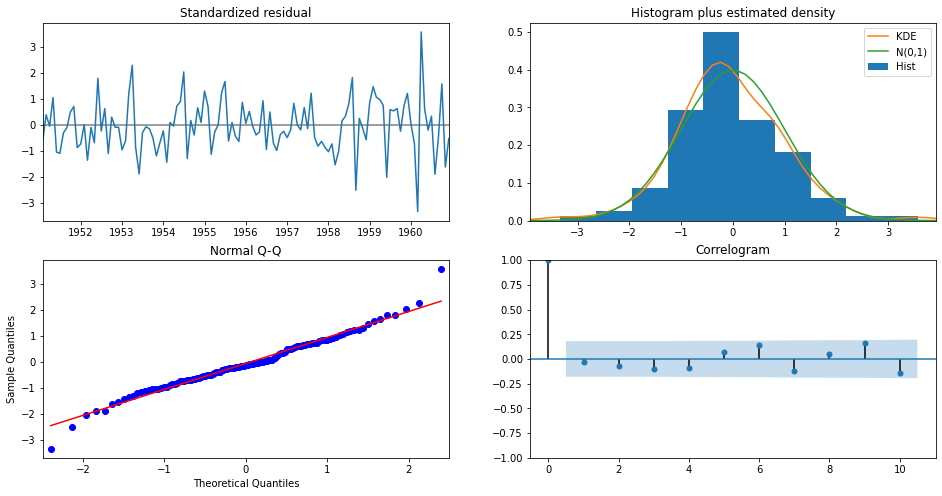

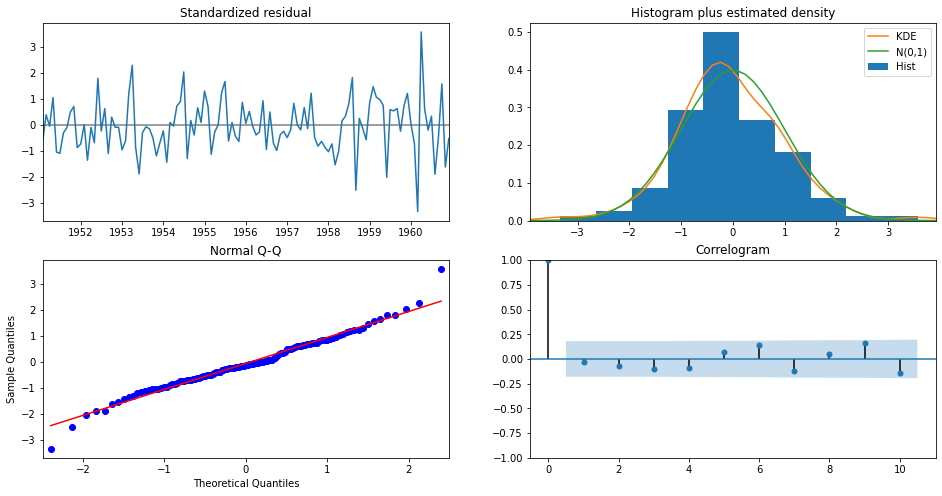

In [301]:
results.plot_diagnostics(figsize=(16, 8))

In [302]:
data.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [306]:
pred = results.get_prediction(start=pd.to_datetime('1951-01-01'), dynamic=False)
pred_ci = pred.conf_int()

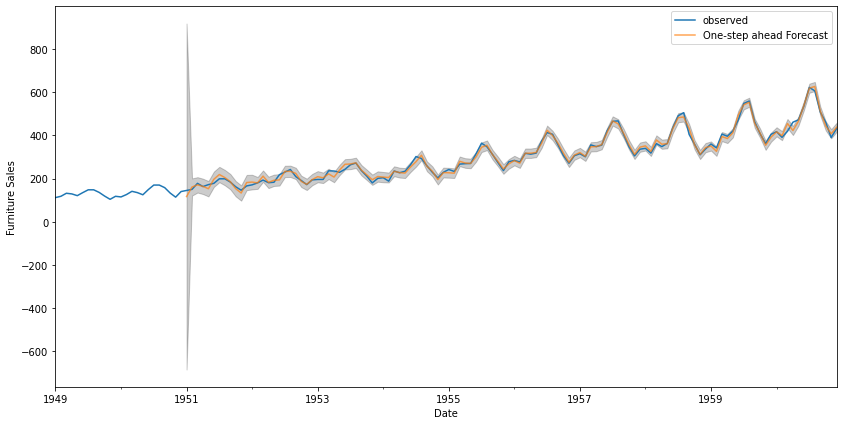

In [307]:
ax = ts['1940':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

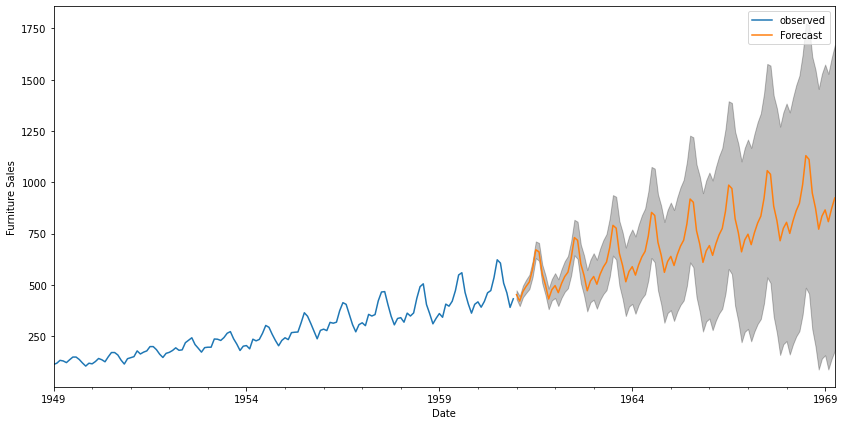

In [309]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = ts.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()